4 Coordinate Model

In [997]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [998]:
# get the main paths
df = pd.read_csv('../simulations/data/small_trajectories.csv')

In [999]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     105 non-null    int64  
 1   name           105 non-null    object 
 2   latitude_1     105 non-null    float64
 3   longitude_1    105 non-null    float64
 4   latitude_2     105 non-null    float64
 5   longitude_2    105 non-null    float64
 6   latitude_3     105 non-null    float64
 7   longitude_3    105 non-null    float64
 8   latitude_4     105 non-null    float64
 9   longitude_4    105 non-null    float64
 10  enter-parking  105 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 9.1+ KB


In [1000]:
df.head()

,Unnamed: 0,name,latitude_1,longitude_1,latitude_2,longitude_2,latitude_3,longitude_3,latitude_4,longitude_4,enter-parking
0,0,1_A_Missed,36.110406,-115.141087,36.110440,-115.141107,36.110466,-115.141131,36.110496,-115.141159,0
1,1,2_A_Missed,36.110411,-115.141099,36.110430,-115.141109,36.110452,-115.141130,36.110475,-115.141151,0
2,2,3_A_Missed,36.110411,-115.141082,36.110435,-115.141093,36.110457,-115.141110,36.110483,-115.141131,0
3,3,4_A_Missed,36.110432,-115.141133,36.110458,-115.141153,36.110487,-115.141167,36.110518,-115.141178,0
4,4,5_A_Missed,36.110441,-115.141155,36.110463,-115.141168,36.110485,-115.141176,36.110509,-115.141185,0


In [1001]:
# Split up
def split_data(amount, data):
    """
    Splits the columns of the data and returns a new data frame
    Args:
        amount:

    Returns:

    """
    # Create dataframe columns first
    columns = []
    for index in range(1, amount + 1):
        latitude = 'latitude_' + str(index)
        longitude = 'longitude_' + str(index)
        altitude = 'altitude_relative_to_ground_' + str(index)
        columns.append(latitude)
        columns.append(longitude)
        columns.append(altitude)

    columns.append('enter-parking')

    coord1 = data[data.columns[2:14]].values
    coord1 = np.column_stack((coord1, data['enter-parking'].values))

    coord2 = data[data.columns[14:26]].values
    coord2 = np.column_stack((coord2, data['enter-parking'].values))

    coord3 = data[data.columns[26:38]].values
    coord3 = np.column_stack((coord3, data['enter-parking'].values))

    coord4 = data[data.columns[38:50]].values
    coord4 = np.column_stack((coord4, data['enter-parking'].values))

    coord5 = data[data.columns[50:62]].values
    coord5 = np.column_stack((coord5, data['enter-parking'].values))

    all_coords = np.concatenate((coord1, coord2, coord3, coord4, coord5), axis=0)

    new_data = pd.DataFrame(all_coords, columns=columns)

    new_data = new_data.astype({'enter-parking': np.int})

    return new_data

# new_df = split_data(4, df)

In [1002]:
# Get The cordinates for x
x = df[df.columns[2:10]]

# Get the last coordinate
y = df['enter-parking'].values

In [1003]:
print(x)
print(y)

     latitude_1  longitude_1  latitude_2  longitude_2  latitude_3  \
0     36.110406  -115.141087   36.110440  -115.141107   36.110466   
1     36.110411  -115.141099   36.110430  -115.141109   36.110452   
2     36.110411  -115.141082   36.110435  -115.141093   36.110457   
3     36.110432  -115.141133   36.110458  -115.141153   36.110487   
4     36.110441  -115.141155   36.110463  -115.141168   36.110485   
..          ...          ...         ...          ...         ...   
100   36.110419  -115.140879   36.110431  -115.140841   36.110440   
101   36.110458  -115.140935   36.110467  -115.140907   36.110477   
102   36.110440  -115.140927   36.110450  -115.140902   36.110458   
103   36.110473  -115.140919   36.110486  -115.140864   36.110495   
104   36.110112  -115.140850   36.110143  -115.140826   36.110178   

     longitude_3  latitude_4  longitude_4  
0    -115.141131   36.110496  -115.141159  
1    -115.141130   36.110475  -115.141151  
2    -115.141110   36.110483  -115.1411

In [1004]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=62)

In [1005]:
# Scale data
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [1006]:
x_train.shape

(78, 8)

In [1007]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Model creation
model = Sequential()

# 8 neurons for input layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(6, activation='relu'))
model.add(Dropout(0.3))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

/home/mikey/PycharmProjects/smart-park/venv/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [1008]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=100,
                    validation_data=(x_test, y_test),
                    callbacks=early_stop,
                    shuffle=True)

Epoch 1/100
3/3 [==============================] - 1s 65ms/step - loss: 0.6925 - accuracy: 0.5128 - val_loss: 0.6825 - val_accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 9ms/step - loss: 0.6661 - accuracy: 0.6154 - val_loss: 0.6653 - val_accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 0.6438 - accuracy: 0.6667 - val_loss: 0.6482 - val_accuracy: 0.9259
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 0.6669 - accuracy: 0.6282 - val_loss: 0.6211 - val_accuracy: 0.9259
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 0.6435 - accuracy: 0.6667 - val_loss: 0.5864 - val_accuracy: 0.8889
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 0.6406 - accuracy: 0.6410 - val_loss: 0.5537 - val_accuracy: 0.8

In [1009]:
losses = pd.DataFrame(model.history.history)

In [1010]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

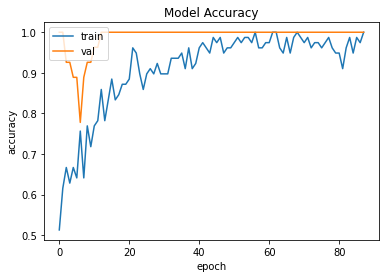

In [1011]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

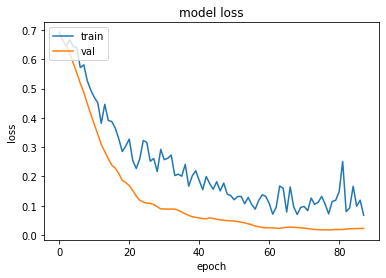

In [1012]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [1013]:
test_df = pd.read_csv('../simulations/data/test_small_trajectories.csv')

In [1014]:
test_x = test_df[test_df.columns[2:10]]

test_y = test_df['enter-parking'].values

In [1015]:
test_x = scaler.transform(test_x)

In [1016]:
print(test_x)

print(test_y)

[[0.03080931 0.66951253 0.03937672 0.66810336 0.04266549 0.6493716
  0.03942459 0.63662004]
 [0.16301581 0.72259949 0.17721296 0.7062556  0.17999388 0.68888404
  0.1717642  0.67293469]
 [0.72164553 0.52887715 0.68863522 0.57620122 0.66109653 0.61069989
  0.61524619 0.63813285]
 [0.68083766 0.61335931 0.66089965 0.64692862 0.63561875 0.66892044
  0.59061112 0.69770578]
 [0.73464177 0.86061244 0.71930435 0.86923248 0.70400452 0.85799913
  0.66223245 0.85157865]
 [0.32056889 0.78064156 0.33574087 0.75295621 0.34854525 0.73218963
  0.33487484 0.71790252]
 [0.20449285 0.19489468 0.22838282 0.2007847  0.25561499 0.18853035
  0.25653748 0.19028332]
 [0.21579251 0.32447147 0.23719514 0.31134679 0.2397343  0.29385057
  0.23136948 0.27598964]
 [0.901246   0.49536086 0.92469301 0.46886414 0.93218527 0.42875099
  0.90076321 0.39773026]
 [0.68436158 0.13314025 0.68284753 0.10301866 0.68107352 0.05893404
  0.65519359 0.04315791]
 [0.96662708 0.51629815 0.97334641 0.48401248 0.96253431 0.44921901
  0

In [1017]:
predictions = (model.predict(test_x) > 0.5).astype("int32")

print(predictions)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]


In [1018]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.86      1.00      0.92         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



In [1019]:
print(confusion_matrix(test_y, predictions))

[[5 1]
 [0 6]]
